In [13]:
from typing import Annotated
from langgraph.graph import StateGraph, START,END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import display, Markdown
import gradio as gr 
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import random

In [14]:
# useful constants
nouns = ['Cabbages', 'Unicorns', 'Toasters', 'Penguins', 'Rainbows', 'Kittens', 'Puppies', 'Dragons', 'Aliens', 'Monsters']
adjectives = ['Outragious', 'smelly','pedantic', 'existential', 'silly', 'serious', 'funny', 'boring', 'exciting', 'mysterious']

In [15]:
# load environment variables
load_dotenv(override=True)

True

In [16]:
def shout(text: Annotated[str, "Something to be Shouted"]) -> str:
    """Convert text to uppercase and add exclamation marks."""
    print(text.upper())
    return text.upper()
shout("hello")

HELLO


'HELLO'

In [17]:
# state object
class State(BaseModel):
    messages: Annotated[list, add_messages]

In [18]:
# start graph builder
graph_builder = StateGraph(State)

In [19]:
# create a node
def our_first_node(old_state: State) -> State:
    """A simple node that returns a new state with a message."""
    replay = f"{random.choice(adjectives)} are {random.choice(nouns)}"
    # Append the assistant message to the existing messages
    messages = old_state.messages + [{"role": "assistant", "content": replay}]
    new_state = State(messages=messages)
    return new_state

graph_builder.add_node("first_node", our_first_node) # type: ignore

In [20]:
# create edge
graph_builder.add_edge(START, "first_node")
graph_builder.add_edge("first_node", END)

In [21]:
# compile the graph
graph = graph_builder.compile()

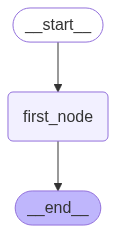

In [22]:
# draw the graph 
from IPython.display import Image
display(Image(graph.get_graph().draw_mermaid_png()))


In [26]:
def chat(user_input: str, history):
    message = {"role": "user", "content": user_input}
    messages = [message]
    state = State(messages=messages)
    result = graph.invoke(state)
    print(result)
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7866
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='e4a371ba-459e-4b24-a143-ccaddb224859'), AIMessage(content='funny are Kittens', additional_kwargs={}, response_metadata={}, id='e68c094d-0177-44cd-9e76-c524b9a786f1')]}
{'messages': [HumanMessage(content='ok', additional_kwargs={}, response_metadata={}, id='3f227bca-6368-487c-91f6-d7be4aa7b43d'), AIMessage(content='boring are Toasters', additional_kwargs={}, response_metadata={}, id='1c42dbcd-276d-4060-a670-ab9657903943')]}
{'messages': [HumanMessage(content='ok', additional_kwargs={}, response_metadata={}, id='3f227bca-6368-487c-91f6-d7be4aa7b43d'), AIMessage(content='boring are Toasters', additional_kwargs={}, response_metadata={}, id='1c42dbcd-276d-4060-a670-ab9657903943')]}
{'messages': [HumanMessage(content='do say that', additional_kwargs={}, response_metadata={}, id='1583fbad-79aa-4bd7-aebb-fb16036cfcb6'), AIMessage(content='silly are Cabbages', additional_kwargs={}, response_metadata={}, id=